# Absorption by a single species

In [1]:
import pyarts
import numpy as np
import matplotlib.pyplot as plt

## Select absorption species

In [2]:
species = "O2-66"  # Main isotope of O2

## Activate the recipe for this species

See [SingleSpeciesAbsorption](pyarts.recipe.rst#pyarts.recipe.SingleSpeciesAbsorption).

In [3]:
absorption = pyarts.recipe.SingleSpeciesAbsorption(species=species)

## Select a single temperature, a VMR value, and a range of pressures

In [4]:
atm = pyarts.arts.AtmPoint()
atm.set_species_vmr("O2", 0.2095)
atm.temperature = 273
ps = np.logspace(5, -2, 8)

## Select frequency range

In [5]:
line_f0 = 118750348044.712  # Lowest energy absorption line
f = np.linspace(-500e6, 500e6, 1001) + line_f0  # Some range around it

## Use the recipe and convert the results to cross-sections

In [6]:
xsec = []
for p in ps:
    atm.pressure = p
    xsec.append(absorption(f, atm) / atm.number_density(species))
xsec = np.array(xsec)

## Plot the results

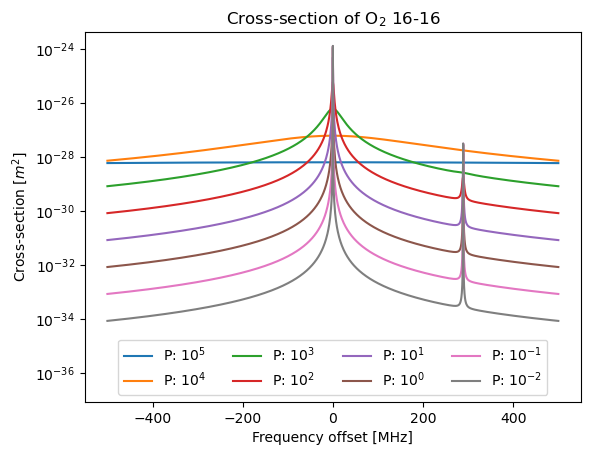

In [7]:
plt.semilogy((f - line_f0) / 1e6, xsec.T)
plt.xlabel("Frequency offset [MHz]")
plt.ylabel("Cross-section [$m^2$]")
plt.title("Cross-section of O$_2$ 16-16")
plt.ylim(ymin=1e-3 * np.min(xsec))
plt.legend(
    [f"P: $10^{'{'}{round(np.log10(x))}{'}'}$" for x in ps],
    ncols=4,
    loc="lower center",
)

## Integration test by ensuring some statistics look good

In [8]:
assert np.isclose(6.7940695853245560e-28 / xsec.mean(), 1)
assert np.isclose(5.4406909239279050e-24 / xsec.sum(), 1)
assert np.isclose(1.3361953365612772e-24 / xsec.max(), 1)
assert np.isclose(2.5383142016771395e-26 / xsec.std(), 1)
assert np.isclose(8.2386317491421410e-35 / xsec.min(), 1)